<a href="https://colab.research.google.com/github/HeberPareja/IA-MiniRobots_2024-2/blob/master/EjercicioN5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Ejercicio N° 5.2
*   Universidad Nacional de Colombia
*   Inteligencia Artificial y Mini-Robots 2024-2
*   Heber Alexander Pareja Romero
*   haparejar@unal.edu.co

# **<> Introducción**

Se pedía a cada estudiante recolectar 100 imágenes de perros y 100 de gatos para conformar un dataset del curso. Sin embargo, para este proyecto, se duplicó la cantidad de imágenes por categoría, obteniendo un total de 6000 imágenes por cada clase, asumiendo un grupo de 30 estudiantes, aunque en la práctica el dataset fue descargado de internet. Con este conjunto de datos, se entrenó una red neuronal convolucional, que es más efectiva que una red feedforward para la clasificación de imágenes, ya que puede extraer patrones espaciales mediante filtros y capas de convolución.

El código desarrollado verifica si existe un modelo previamente entrenado; si no, entrena uno nuevo utilizando TensorFlow y Keras, con 10 épocas y un tamaño de lote de 64. También muestra la estructura de la red, indicando la cantidad de neuronas en cada capa. Finalmente, permite al usuario probar el modelo ingresando la ruta de una imagen, la cual es procesada y clasificada como gato o perro, mostrando el resultado junto a la imagen.

# **<> Desarrollo**

Se importan las librerías necesarias

In [1]:
import os  # Para manejo de rutas y archivos
import numpy as np  # Para operaciones numéricas y manejo de arreglos
import matplotlib.pyplot as plt  # Para visualización de imágenes y gráficos
import tensorflow as tf  # Para aprendizaje profundo y redes neuronales
from tensorflow.keras import layers, models, Sequential  # Para construcción de modelos de redes neuronales
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # Para carga y conversión de imágenes para procesamiento

Se implementa un sistema de clasificación de imágenes de gatos y perros utilizando una red neuronal convolucional (CNN). Primero, se define la función load_data(), que carga y preprocesa las imágenes desde carpetas organizadas por categoría, normalizando los valores de los píxeles y asignando etiquetas numéricas a cada clase. Luego, la función create_model() construye una CNN con capas convolucionales, de max pooling y densas, utilizando la activación ReLU y una capa de salida con activación sigmoide para clasificación binaria. El modelo se compila con el optimizador Adam y la función de pérdida de entropía cruzada binaria. Finalmente, las funciones save_model() y load_trained_model() permiten guardar y cargar el modelo entrenado, facilitando su reutilización sin necesidad de volver a entrenarlo.

In [6]:
IMAGE_SIZE = 64  # Tamaño al que se redimensionarán las imágenes
DATASET_PATH = "/content/drive/MyDrive"  # Ruta base de las imágenes: Mi Unidad en Google Drive

def load_data():
    categories = {'Cat': 0, 'Dog': 1}  # Diccionario de categorías y etiquetas
    images, labels = [], []  # Listas para almacenar imágenes y etiquetas

    for category, label in categories.items():
        folder_path = os.path.join(DATASET_PATH, category)  # Construir ruta de la carpeta
        if not os.path.exists(folder_path):
            print(f"Advertencia: La carpeta {folder_path} no existe.")  # Aviso si la carpeta no existe
            continue

        for filename in sorted(os.listdir(folder_path)):  # Iterar sobre los archivos en la carpeta
            if not filename.lower().endswith(('png', 'jpg', 'jpeg')):
                continue  # Ignorar archivos que no sean imágenes
            try:
                img_path = os.path.join(folder_path, filename)  # Construir ruta de la imagen
                img = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE), color_mode='rgb')  # Cargar imagen a color y redimensionar
                img_array = img_to_array(img) / 255.0  # Convertir imagen a arreglo y normalizar valores
                images.append(img_array)  # Agregar imagen a la lista
                labels.append(label)  # Agregar etiqueta correspondiente
            except Exception as e:
                print(f"Error al procesar {filename}: {e}")  # Manejo de errores en la carga de imágenes

    return np.array(images), np.array(labels)  # Convertir listas a arreglos de NumPy y retornarlas

def create_model():
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),  # Capa convolucional con 32 filtros
        layers.MaxPooling2D((2, 2)),  # Capa de max pooling para reducción de dimensiones
        layers.Conv2D(64, (3, 3), activation='relu'),  # Segunda capa convolucional con 64 filtros
        layers.MaxPooling2D((2, 2)),  # Segunda capa de max pooling
        layers.Conv2D(128, (3, 3), activation='relu'),  # Tercera capa convolucional con 128 filtros
        layers.MaxPooling2D((2, 2)),  # Tercera capa de max pooling
        layers.Flatten(),  # Aplanar la salida de las capas convolucionales para la entrada a la capa densa
        layers.Dense(128, activation='relu'),  # Capa densa con 128 neuronas y activación ReLU
        layers.Dense(1, activation='sigmoid')  # Capa de salida con activación sigmoide para clasificación binaria
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compilar el modelo con optimizador Adam
    return model  # Retornar el modelo creado

def save_model(model, filename='cat_dog_model.h5'):
    model.save(filename)  # Guardar el modelo en un archivo H5

def load_trained_model(filename='cat_dog_model.h5'):
    return tf.keras.models.load_model(filename)  # Cargar el modelo guardado

Se define la función main(), que gestiona la ejecución del programa. Primero, se verifica si existe un modelo previamente guardado (cat_dog_model.h5). Si el modelo está disponible, lo carga; de lo contrario, entrena un nuevo modelo utilizando los datos de imágenes y etiquetas, ajustando la CNN durante 10 épocas con un tamaño de lote de 64 y una partición del 20% para validación. Luego, guarda el modelo entrenado. Finalmente, permite al usuario probar la clasificación con imágenes específicas ingresando su ruta. La imagen seleccionada se carga, normaliza y ajusta al formato requerido por la CNN, y se predice su categoría, mostrando el resultado visualmente con matplotlib.

Modelo cargado con éxito.
Introduce la ruta de una imagen para probar (o 'salir' para finalizar): /content/drive/MyDrive/Cat/6.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


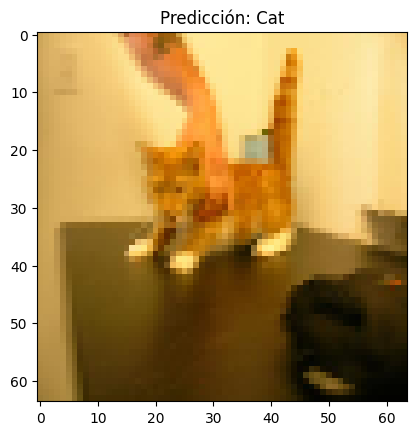

Introduce la ruta de una imagen para probar (o 'salir' para finalizar): /content/drive/MyDrive/Cat/8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


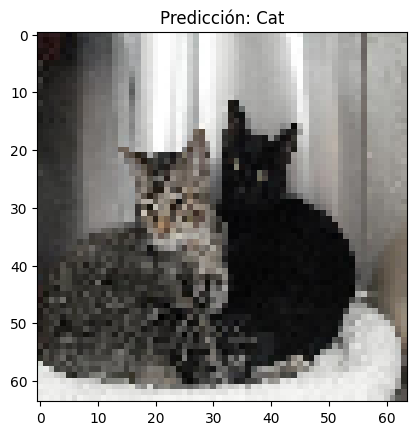

Introduce la ruta de una imagen para probar (o 'salir' para finalizar): /content/drive/MyDrive/Dog/6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


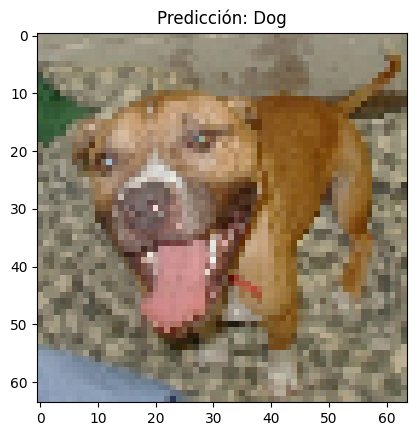

Introduce la ruta de una imagen para probar (o 'salir' para finalizar): /content/drive/MyDrive/Cat/600.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


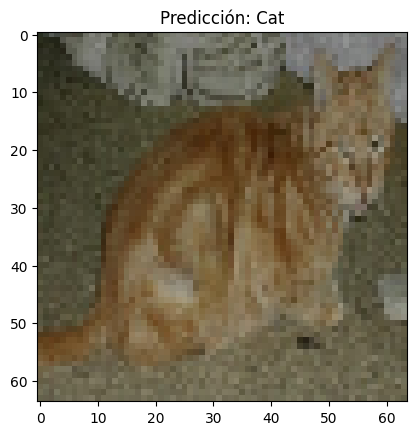

Introduce la ruta de una imagen para probar (o 'salir' para finalizar): /content/drive/MyDrive/Dog/600.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


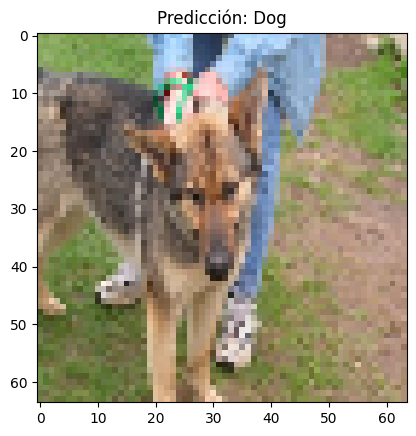

Introduce la ruta de una imagen para probar (o 'salir' para finalizar): /content/drive/MyDrive/Dog/678.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


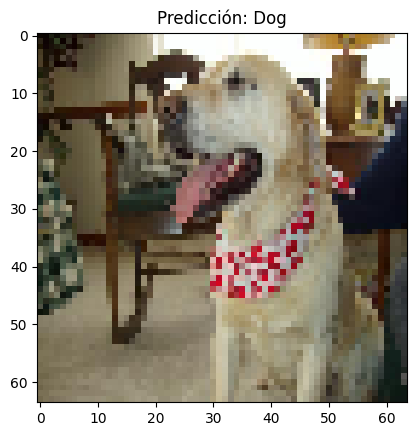

Introduce la ruta de una imagen para probar (o 'salir' para finalizar): salir


In [16]:
def main():
    if os.path.exists('cat_dog_model.h5'):
        model = load_trained_model()
        print("Modelo cargado con éxito.")
    else:
        print("Entrenando el modelo...")
        X, Y = load_data()
        model = create_model()
        model.fit(X, Y, epochs=10, batch_size=64, validation_split=0.2)  # Aumentar número de épocas
        save_model(model)
        print("Entrenamiento completado y modelo guardado.")

    # Prueba con una imagen específica
    while True:
        img_path = input("Introduce la ruta de una imagen para probar (o 'salir' para finalizar): ")
        if img_path.lower() == 'salir':
            break
        try:
            img = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE), color_mode='rgb')  # Asegurarse que sea a color
            img_array = img_to_array(img) / 255.0
            img_array = img_array.reshape(1, IMAGE_SIZE, IMAGE_SIZE, 3)  # Ajustar el formato para CNN
            prediction = model.predict(img_array)[0][0]
            predicted_label = 'Dog' if prediction > 0.5 else 'Cat'

            plt.imshow(img_array.reshape(IMAGE_SIZE, IMAGE_SIZE, 3))  # Asegurarse de mostrar la imagen en color
            plt.title(f'Predicción: {predicted_label}')
            plt.show(plt.show(block=False))  # Evita que se bloquee el flujo)
            plt.pause(2)  # Pausa breve para visualizar la imagen

        except Exception as e:
            print(f"Error al procesar la imagen: {e}")

main()

# **<> Conclusiones**

Como se puede observar, el modelo es capaz de clasificar imágenes de gatos y perros con una precisión aceptable, aunque en ocasiones comete errores en la predicción. Esto puede deberse a la cantidad y calidad de los datos utilizados, así como a la arquitectura del modelo y el número de épocas de entrenamiento. Para mejorar su desempeño, se podría aumentar el tamaño del dataset, aplicar técnicas de aumento de datos, ajustar los hiperparámetros del modelo o utilizar arquitecturas más avanzadas como redes preentrenadas. Además, optimizar el preprocesamiento de imágenes y realizar una mejor selección de características ayudaría a reducir la tasa de error.